# 1. Data Loading (Local file에서 불러들이기, URL)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 로컬 파일에서 데이터 불러오기
data = pd.read_csv("C:/Users/biank/Downloads/baseball_players.csv")

# 또는 URL에서 데이터 불러오기
#url = 'https://example.com/data.csv'
#data = pd.read_csv(url)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1034 non-null   object 
 1   Team            1034 non-null   object 
 2   Position        1034 non-null   object 
 3   Height(inches)  1034 non-null   int64  
 4   Weight(pounds)  1033 non-null   float64
 5   Age             1034 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.6+ KB


In [4]:
data

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


# 2. 결측치제거

In [5]:
#결측치 확인
data.isnull().sum()

Name              0
Team              0
Position          0
Height(inches)    0
Weight(pounds)    1
Age               0
dtype: int64

In [6]:
data = data.dropna()  # 결측치가 있는 행 제거

In [7]:
data.dropna(axis=0)

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


# 3. 분류의 경우 라벨링 갯수 확인 후 그래프표시

In [8]:
columns = data.columns
print(columns)

Index(['Name', 'Team', 'Position', 'Height(inches)', 'Weight(pounds)', 'Age'], dtype='object')


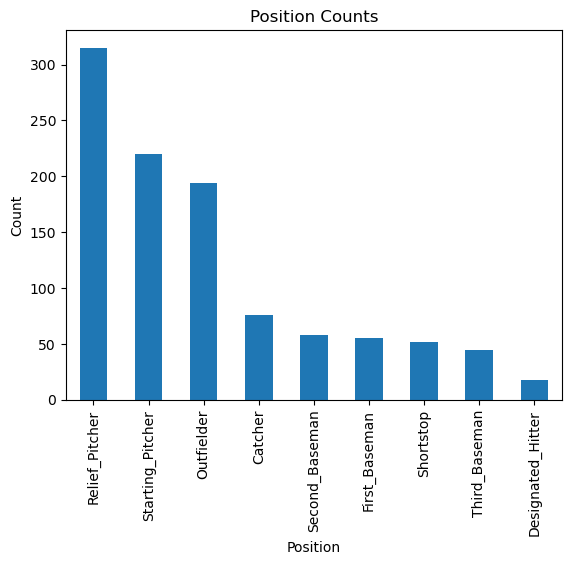

In [9]:
import matplotlib.pyplot as plt

label_counts = data['Position'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Position Counts')
plt.show()

# 4., 데이터 값 + 라벨링 Merge후 Coefficient (상관관계 조사), 불필요한 컬럼삭제

In [10]:
#'Name'을 기준으로 'Label'이라는 칼럼을 가지고 있다고 가정하면, 
#다음과 같이 label 데이터를 정의하고 데이터를 병합할 수 있습니다:


#label = pd.DataFrame({'Name': ['A', 'B', 'C'], 'Label': [1, 0, 1]})

# 데이터와 라벨링 데이터 병합
#merge_data = data.merge(label, on='Name', how='inner')

# 데이터 간의 상관관계 조사
#correlation = merge_data.corr()

# 상관관계 결과 출력
#print(correlation)

In [11]:
# 데이터 간의 상관관계 조사
correlation = data.corr()

# 상관관계 결과 출력
print(correlation)

                Height(inches)  Weight(pounds)       Age
Height(inches)        1.000000        0.531886 -0.073851
Weight(pounds)        0.531886        1.000000  0.158282
Age                  -0.073851        0.158282  1.000000


In [12]:
merge_data = data.merge(data, on='Name', how='inner')  # 데이터와 라벨링 병합

# 데이터 간의 상관관계 조사
correlation = merge_data.corr()

print(correlation)

                  Height(inches)_x  Weight(pounds)_x     Age_x  \
Height(inches)_x          1.000000          0.534627 -0.074128   
Weight(pounds)_x          0.534627          1.000000  0.159295   
Age_x                    -0.074128          0.159295  1.000000   
Height(inches)_y          0.988307          0.523333 -0.077354   
Weight(pounds)_y          0.523333          0.989087  0.156196   
Age_y                    -0.077354          0.156196  0.999019   

                  Height(inches)_y  Weight(pounds)_y     Age_y  
Height(inches)_x          0.988307          0.523333 -0.077354  
Weight(pounds)_x          0.523333          0.989087  0.156196  
Age_x                    -0.077354          0.156196  0.999019  
Height(inches)_y          1.000000          0.534627 -0.074128  
Weight(pounds)_y          0.534627          1.000000  0.159295  
Age_y                    -0.074128          0.159295  1.000000  


In [13]:
columns = merge_data.columns
print(columns)

Index(['Name', 'Team_x', 'Position_x', 'Height(inches)_x', 'Weight(pounds)_x',
       'Age_x', 'Team_y', 'Position_y', 'Height(inches)_y', 'Weight(pounds)_y',
       'Age_y'],
      dtype='object')


In [14]:
# 불필요한 칼럼 삭제
columns_to_drop = ['Name', 'Team', 'Position']  # 삭제하고자 하는 칼럼들의 리스트
data = data.drop(columns=columns_to_drop, axis=1)

# 상관관계 결과 출력
correlation = data.corr()
print(correlation)

                Height(inches)  Weight(pounds)       Age
Height(inches)        1.000000        0.531886 -0.073851
Weight(pounds)        0.531886        1.000000  0.158282
Age                  -0.073851        0.158282  1.000000


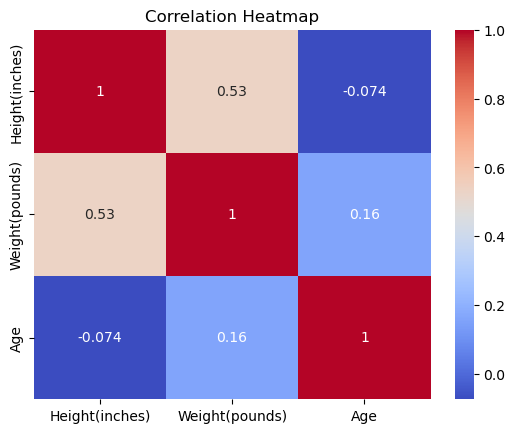

In [23]:
# 데이터 로딩 및 전처리 (위의 과정 참고)

# 상관 관계 계산
correlation = data.corr()

# Heatmap 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [48]:
data_pivot = pd.pivot_table(index = 'Height(inches)', columns = 'Weight(pounds)', values = 'Age', data = data)
data_pivot

Weight(pounds),150.0,155.0,156.0,160.0,163.0,164.0,165.0,167.0,168.0,170.0,...,249.0,250.0,254.0,255.0,257.0,260.0,270.0,275.0,278.0,290.0
Height(inches),,,,,,,,,,,,,,,,,,,,,
67,NaN,NaN,NaN,NaN,NaN,NaN,32.110000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,22.11,26.460,NaN,29.100000,NaN,NaN,NaN,28.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,24.430000,NaN,NaN,29.090000,NaN,24.33,33.030000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,23.405,NaN,27.630000,37.66,NaN,27.903333,NaN,NaN,27.344000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,29.23,NaN,NaN,29.193333,NaN,NaN,23.040000,27.50,NaN,25.528000,...,NaN,33.770000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,26.07,NaN,NaN,24.326667,NaN,NaN,NaN,30.51,NaN,26.057000,...,NaN,NaN,NaN,NaN,NaN,22.81,NaN,NaN,NaN,NaN
73,NaN,NaN,NaN,27.143333,NaN,31.63,NaN,NaN,NaN,27.466667,...,NaN,23.340000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,25.125000,NaN,NaN,26.330000,NaN,NaN,28.873333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,27.32,NaN,NaN,NaN,NaN,NaN,NaN,25.390000,...,NaN,NaN,NaN,NaN,NaN,NaN,25.96,NaN,24.21,NaN


Text(0.5, 1.0, 'Correlation analysis')

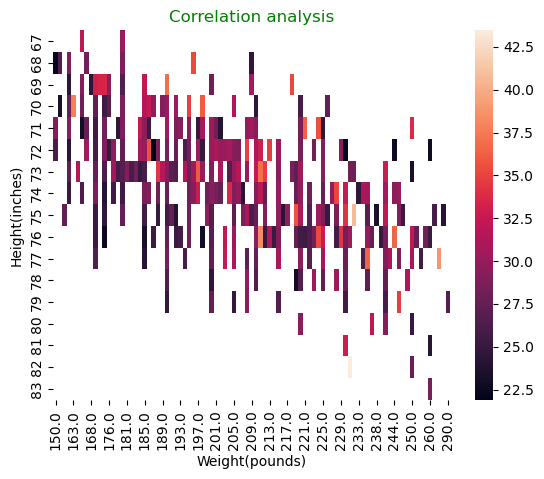

In [49]:
sns.heatmap(data_pivot)
plt.title('Correlation analysis', color='green')

# 5. StandardScale 사용하여 규제

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 6. 데이터값 + 라벨링 분리후 Training / Test 분류

일반적으로, X에는 모델의 입력 데이터인 피쳐(Feature)들을 넣습니다. 피쳐는 모델이 학습하고 예측에 사용할 데이터로, 예를 들어 특정 문제에서는 나이, 성별, 소득 등과 같은 개별 변수들이 피쳐가 될 수 있습니다. 이러한 피쳐들을 적절한 형태로 변환하여 X에 넣어줍니다.

y에는 모델이 예측하고자 하는 대상인 라벨링 데이터를 넣습니다. 라벨링 데이터는 모델이 학습을 통해 예측하고자 하는 값을 의미하며, 예를 들어 특정 문제에서는 주택 가격, 고객 구매 여부, 질병 발생 여부 등과 같은 예측 대상 변수가 라벨링 데이터가 될 수 있습니다.

따라서, X에는 입력 데이터의 피쳐들을, y에는 예측하고자 하는 대상 변수의 라벨링 데이터를 넣어주어야 합니다. 이에 따라 X와 y를 적절하게 설정하여 train_test_split 함수를 호출하여 학습용과 테스트용 데이터를 분할하면 됩니다.

In [25]:
from sklearn.model_selection import train_test_split

y = data['Height(inches)']
X = data.drop('Height(inches)', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 학습용과 테스트용으로 데이터 분할

print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_train.shape)

X_train.shape : (826, 2)
y_train.shape : (826,)
X_test.shape: (207, 2)
y_test.shape: (826,)


# 7. 회귀 4가지(SVR, DT, RF, LR 사용하여 회귀예측 후 MSE 값 구하고기

In [26]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [27]:
# SVR 모델 학습 및 예측
svm = SVR()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_pred)

In [29]:
# DT 모델 학습 및 예측
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

In [30]:
# RF 모델 학습 및 예측
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

In [31]:
# LR 모델 학습 및 예측
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

In [33]:
print("SVR MSE: ", svm_mse)
print("DT MSE: ", dt_mse)
print("RF MSE: ", rf_mse)
print("LR MSE: ", lr_mse)

SVR MSE:  3.485646087159198
DT MSE:  7.371980676328502
RF MSE:  4.467917134997315
LR MSE:  3.4186539474119497


# 8. 분류의 경우  4가지(SVC, DT, RF, LR 사용하여 정확도 구하기)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [43]:
# SVC 모델 학습 및 예측
#분류 모델 생성
svc = SVC()
#모델 학습하기 
svc.fit(X_train, y_train)
#모델의 정확도 측정
svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

# DT 모델 학습 및 예측
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_accuracy = accuracy_score(y_test, dtc_pred)

# RF 모델 학습 및 예측
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred)

# LR 모델 학습 및 예측
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

C:\Users\biank\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
print("SVC Accuracy: ", svc_accuracy)
print("DT Accuracy: ", dtc_accuracy)
print("RF Accuracy: ", rfc_accuracy)
print("LR Accuracy: ", lr_accuracy)

SVC Accuracy:  0.1642512077294686
DT Accuracy:  0.15942028985507245
RF Accuracy:  0.15942028985507245
LR Accuracy:  0.1642512077294686


분류 문제: 목표 변수(target variable)가 범주형(categorical) 데이터인 경우 분류 문제로 간주합니다. 즉, 목표 변수가 예/아니오, 참/거짓, 0/1과 같은 카테고리로 구성된 경우를 의미합니다. 분류 문제에서는 모델이 각 데이터를 이산적인 클래스로 할당하는 것이 목적이며, 일반적으로 정확도(accuracy)를 사용하여 모델의 성능을 평가합니다.

회귀 문제: 목표 변수가 연속형(continuous) 데이터인 경우 회귀 문제로 간주합니다. 즉, 목표 변수가 실수값을 가지는 경우를 의미합니다. 회귀 문제에서는 모델이 각 데이터의 연속적인 값을 예측하는 것이 목적이며, 일반적으로 평균 제곱 오차(Mean Squared Error, MSE)를 사용하여 모델의 성능을 평가합니다.